In [1]:
%matplotlib inline
from src import Processor, Reader
import pandas as pd
from datetime import datetime
from sklearn import metrics, model_selection, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# Using the US Census regions from here: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
south_atlantic_states = [
    10   # Delaware
    , 11 # DC
    , 12 # Florida
    , 13 # Georgia
    , 24 # Maryland
    , 37 # North Carolina
    , 45 # South Carolina
    , 51 # Virginia
    , 54 # West Virginia
]
state_filter = south_atlantic_states

In [3]:
state_dict = {
    'code' : ['10', '11', '12', '13', '24', '37', '45', '51', '54']
    , 'state_name' : ['Delware', 'DC', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia']
}

state_code_map = pd.DataFrame(data=state_dict)

In [4]:
state_code_map.head()

,code,state_name
0,10,Delware
1,11,DC
2,12,Florida
3,13,Georgia
4,24,Maryland


## Loading data

In [6]:
# Instantiate preprocessor
preprocessor = Processor.PreProcessor(state_filter=state_filter)

In [112]:
#preprocessor.load_processed_data()

/Users/ashleighlesniak/Documents/cs5644-project/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])
/Users/ashleighlesniak/Documents/cs5644-project/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])


In [7]:
preprocessor.load_processed_data_without_fips_as_columns()

/Users/elizabethmartens/cs5644/project/projectGitRepo/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])
/Users/elizabethmartens/cs5644/project/projectGitRepo/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])


In [8]:
# Put data into a df to work with
df = preprocessor.get_current_data()

In [8]:
df.head()

,gathering_ban_order_group_ban_gatherings_of_any_size,gathering_ban_order_group_ban_over_101_or_more_ppl,gathering_ban_order_group_ban_over_11_to_25_ppl,gathering_ban_order_group_ban_over_1_to_10_ppl,gathering_ban_order_group_ban_over_26_to_50_ppl,gathering_ban_order_group_ban_over_51_to_100_ppl,gathering_ban_order_group_no_order_found,gathering_ban_express_preemption_Expressly Preempts,gathering_ban_express_preemption_Expressly Preempts Less Restrictive Measures,gathering_ban_express_preemption_Unknown,...,restuarants_limited_open_general_indoor_nan,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,is_metro,Series_Complete_Pop_Pct_UR_Equity,cases,deaths,month,days_from_start,STATE
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,230.0,3.0,April,0,10
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,255.0,4.0,April,1,10
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,281.0,4.0,April,2,10
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,288.0,6.0,April,3,10
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,329.0,7.0,April,4,10


In [9]:
df.shape

(289884, 93)

In [17]:
len(df[df['cases'].isnull()][['FIPS', 'date']].drop_duplicates())

844

In [19]:
df[df['cases'].isnull()][['FIPS','date']].drop_duplicates()

,FIPS,date
32984,13109,2020-04-10
32985,13109,2020-04-11
35112,13125,2020-04-10
35113,13125,2020-04-11
35114,13125,2020-04-12
...,...,...
155161,54101,2020-07-01
155162,54101,2020-07-02
155163,54101,2020-07-03
155164,54101,2020-07-04


In [41]:
cases_null_df = df[df['cases'].isna()].copy()
deaths_null_df = df[df['deaths'].isna()].copy()

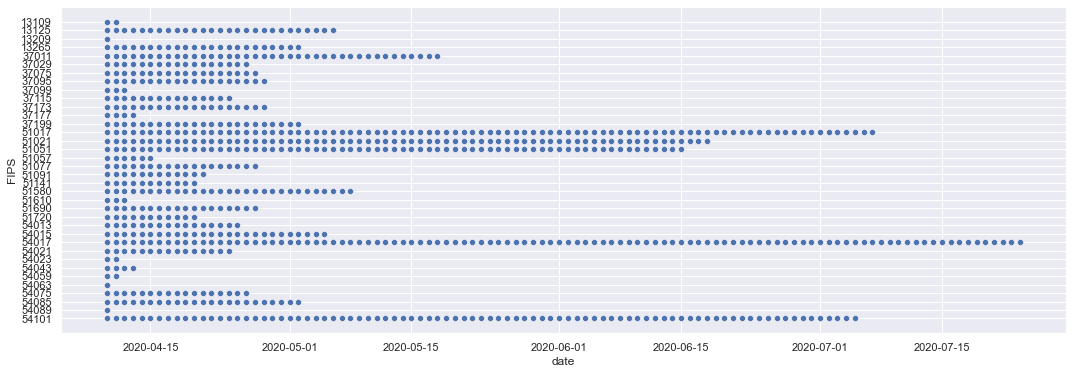

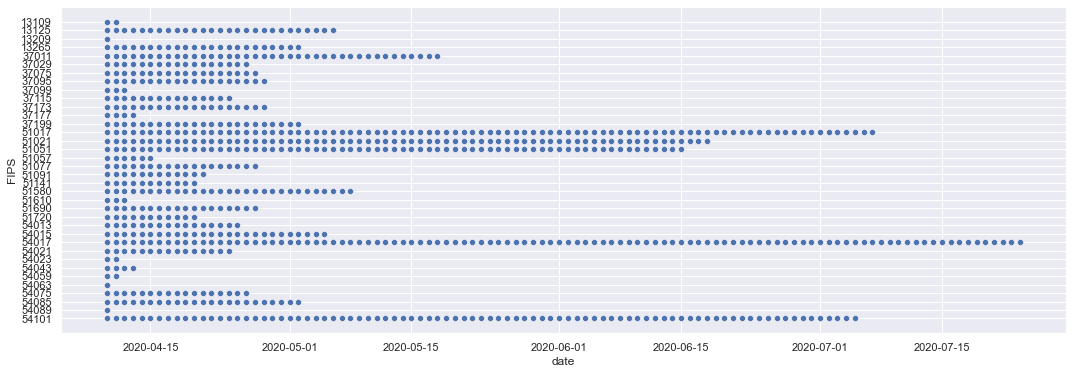

In [44]:
# Based on looking at this, it would appear that these FIPS don't have any data for them for earlier dates
# In the source file. So we'll need to determine how we want to fill those NAs. 
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='FIPS', data=cases_null_df)
plt.show()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='FIPS', data=deaths_null_df)
plt.show()

In [36]:
# Checking what the data looks like (i.e. whether we can fill with 0s)
df[df['FIPS'] == '54085'][['date', 'FIPS', 'cases', 'deaths']].sort_values(['date']).head(40)

,date,FIPS,cases,deaths
152951,2020-04-10,54085,NaN,NaN
152952,2020-04-11,54085,NaN,NaN
152953,2020-04-12,54085,NaN,NaN
152954,2020-04-13,54085,NaN,NaN
152956,2020-04-14,54085,NaN,NaN
152957,2020-04-15,54085,NaN,NaN
152958,2020-04-16,54085,NaN,NaN
152959,2020-04-17,54085,NaN,NaN
152960,2020-04-18,54085,NaN,NaN
152961,2020-04-19,54085,NaN,NaN


In [33]:
# Checking what the data looks like (i.e. whether we can fill with 0s)
df[df['FIPS'] == '37099'][['date', 'FIPS', 'cases', 'deaths']].head(20).sort_values(['date'])

,date,FIPS,cases,deaths
80600,2020-04-10,37099,NaN,NaN
80601,2020-04-11,37099,NaN,NaN
80602,2020-04-12,37099,NaN,NaN
80603,2020-04-13,37099,2.0,0.0
80604,2020-04-14,37099,2.0,0.0
80605,2020-04-15,37099,2.0,0.0
80606,2020-04-16,37099,2.0,0.0
80607,2020-04-17,37099,2.0,0.0
80608,2020-04-18,37099,3.0,0.0
80609,2020-04-19,37099,3.0,0.0


In [ ]:
# Based on the above data, I think we can fill all nas with 0, since they're all at the beginning of the data.
# I've updated the code and added that logic

In [9]:
len(df[df['cases'].isnull()][['FIPS', 'date']].drop_duplicates())

0

In [10]:
len(df[df['deaths'].isnull()][['FIPS', 'date']].drop_duplicates())

0

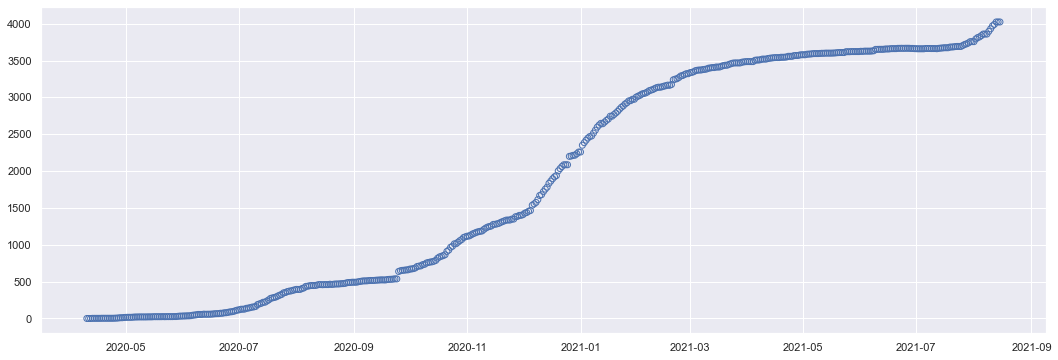

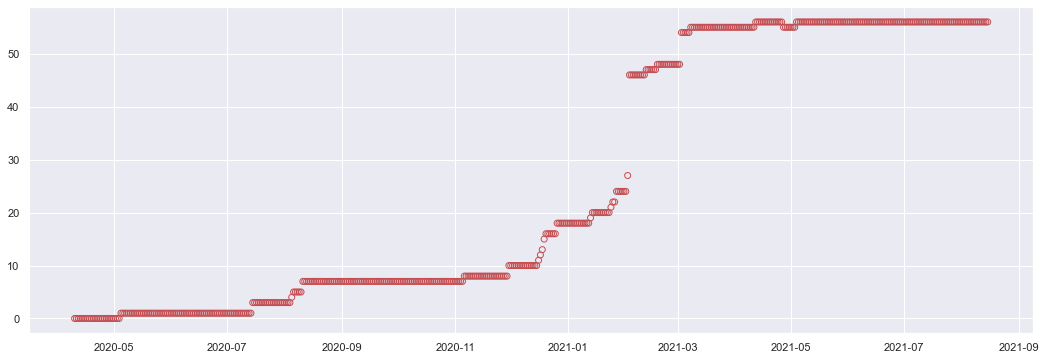

In [13]:
# Checking how the data looks for a few examples
plt.figure(figsize=(18, 6))
plt.scatter(x='date', y='cases', data=df[df['FIPS'] == '37099'], color='none', edgecolor='b')
plt.show()
plt.figure(figsize=(18, 6))
plt.scatter(x='date', y='deaths', data=df[df['FIPS'] == '37099'], color='none', edgecolor='r')
plt.show()

In [ ]:
# This deaths data is funky, but it looks like it's based on reporting irregularities.
# If we wanted to get fancy we could probably do some sort of smoothing since
# right now they report 15 case jumps in a single day, but I honestly think we should work on other stuff
# since I don't think that will mess us up too much.

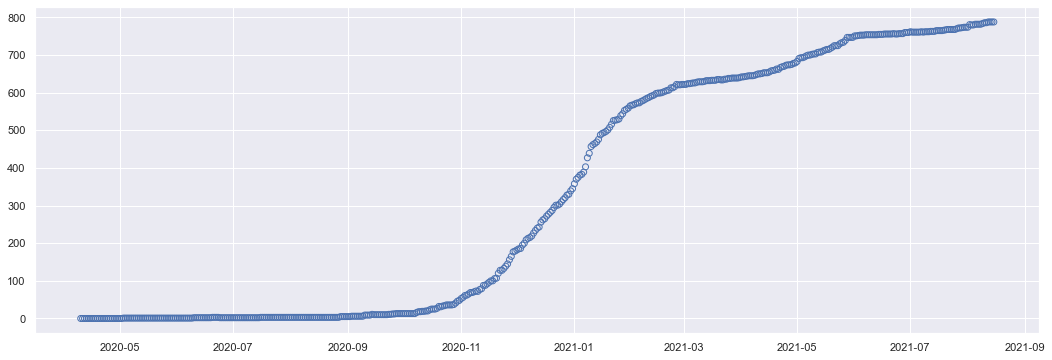

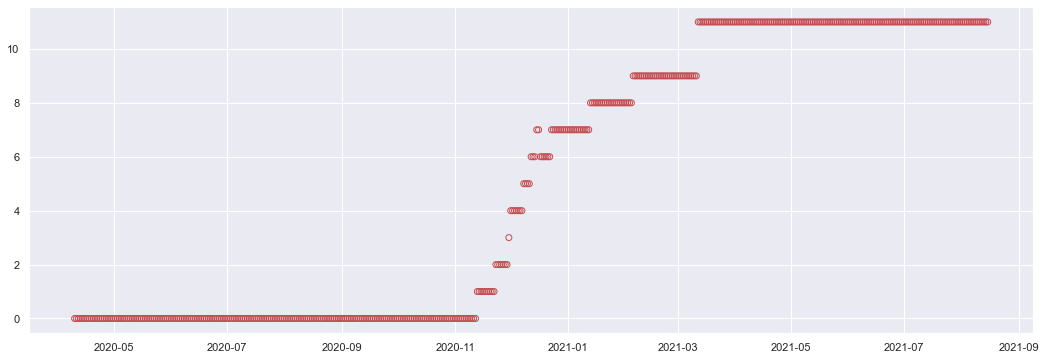

In [14]:
# Checking how the data looks for a few examples
plt.figure(figsize=(18, 6))
plt.scatter(x='date', y='cases', data=df[df['FIPS'] == '54085'], color='none', edgecolor='b')
plt.show()
plt.figure(figsize=(18, 6))
plt.scatter(x='date', y='deaths', data=df[df['FIPS'] == '54085'], color='none', edgecolor='r')
plt.show()